#Montar google drive

In [ ]:
from google.colab import drive
drive.mount('/disco', force_remount=True)

Mounted at /disco


#Invocación a librerías

In [ ]:
import sys
import os
# Generar imagenes por rotación, escalado, brillo, otros
from keras.preprocessing.image import ImageDataGenerator
# Optimiza
from keras import optimizers
# Permite definir el objeto red convolucional
from keras.models import Sequential
# Dense: Crear una capa densa de neuronas
# Activation: Función de activación
# Flatten: Capa para vectorizar (aplanar)
from keras.layers import Dense, Activation, Flatten
# Convolution2D: Crea un capa de convolución 2D (1D, 3D)
# MaxPoling2D: Reducción en 2D (1D, 3D)
from keras.layers import Convolution2D, MaxPooling2D
# backend: se utiliza para liberar memoria
from keras import backend as K

#Limpiar memoria de sesion

In [ ]:
K.clear_session()

#Proporcionar ruta de datos de entrenamiento y validación en el drive

In [ ]:
data_entrenamiento = '/disco/My Drive/fire_dataset_train_test/train'
data_test = '/disco/My Drive/fire_dataset_train_test/test'

#Pre Procesado

In [ ]:
entrenamiento_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True
)

validacion_datagen = ImageDataGenerator(
    rescale = 1./255
)

imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size = (690, 460),
    batch_size = 32,
    class_mode = 'categorical'
)

imagen_validacion = validacion_datagen.flow_from_directory(
    data_test,
    target_size = (690, 460),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 895 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


#Diseño de modelo CNN

In [ ]:
# Creacion del modelo secuancial
cnn = Sequential()

# Capa 1
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(690, 460, 3),
                                                activation = 'relu'))
# Capa 2
cnn.add(MaxPooling2D(pool_size=(2,2)))
# Capa 3
cnn.add(Convolution2D(64, (2,2), padding='same', activation = 'relu'))
# Capa 4
cnn.add(MaxPooling2D(pool_size=(2,2)))
# Capa 5
cnn.add(Convolution2D(128, (3,3), padding='same', activation = 'relu'))
# Capa 6
cnn.add(MaxPooling2D(pool_size=(2,2)))
# Capa 7
cnn.add(Flatten())
# Capa 8
cnn.add(Dense(512, activation='relu'))
# Capa 9
cnn.add(Dense(256, activation='relu'))
# Capa 10
cnn.add(Dense(64, activation='relu'))

cnn.add(Dense(2, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 690, 460, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 345, 230, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 345, 230, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 172, 115, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 172, 115, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 86, 57, 128)       0

#Compilación del modelo

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo

In [ ]:
# Entrenar con:
# Número de veces a procesar en cada epoca = 7
# Epocas =40
# Número de veces a procesar la validación en cada epoca = 200

cnn.fit(imagen_entrenamiento, steps_per_epoch=7, epochs=10,
        validation_data=imagen_validacion, validation_steps=20)

Epoch 1/10
7/7 [==============================] - 68s 9s/step - loss: 0.3015 - accuracy: 0.8661
Epoch 2/10
7/7 [==============================] - 50s 7s/step - loss: 0.1626 - accuracy: 0.9241
Epoch 3/10
7/7 [==============================] - 45s 7s/step - loss: 0.1996 - accuracy: 0.8929
Epoch 4/10
7/7 [==============================] - 41s 6s/step - loss: 0.1306 - accuracy: 0.9420
Epoch 5/10
7/7 [==============================] - 31s 4s/step - loss: 0.1635 - accuracy: 0.9286
Epoch 6/10
7/7 [==============================] - 32s 5s/step - loss: 0.1234 - accuracy: 0.9598
Epoch 7/10
7/7 [==============================] - 28s 4s/step - loss: 0.1280 - accuracy: 0.9462
Epoch 8/10
7/7 [==============================] - 26s 4s/step - loss: 0.0964 - accuracy: 0.9596
Epoch 9/10
7/7 [==============================] - 24s 3s/step - loss: 0.0994 - accuracy: 0.9552
Epoch 10/10
7/7 [==============================] - 26s 4s/step - loss: 0.1349 - accuracy: 0.9598


# Evaluación del modelo

In [ ]:
score = cnn.evaluate(imagen_validacion)
print('Exactitud test: ', score[1])

5/5 [==============================] - 3s 482ms/step - loss: 0.0899 - accuracy: 0.9701
Exactitud test:  0.9701492786407471


In [ ]:
import sklearn.metrics as metrics
import numpy as np

y_pred = cnn.predict(imagen_validacion)
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

5/5 [==============================] - 4s 668ms/step


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#PREDICCIÓN

#Carga de librerías

In [ ]:
import numpy as np
import sys
import os
import tensorflow as tf
from keras.models import load_model

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def Prediccion(ArchivoImagen):
    x = tf.keras.preprocessing.image.load_img(ArchivoImagen, target_size=(690, 460))
    x = tf.keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis=0)

    arreglo = cnn.predict(x)
    resultado = arreglo[0]
    respuesta = np.argmax(resultado)

    if respuesta == 0:
        print('Fire')
    elif respuesta == 1:
        print('Non Fire')

    # Abre la imagen usando matplotlib y la muestra
    imagen = plt.imread(ArchivoImagen)
    plt.imshow(imagen)
    plt.show()


#Predicción

1/1 [==============================] - 0s 21ms/step
Fire


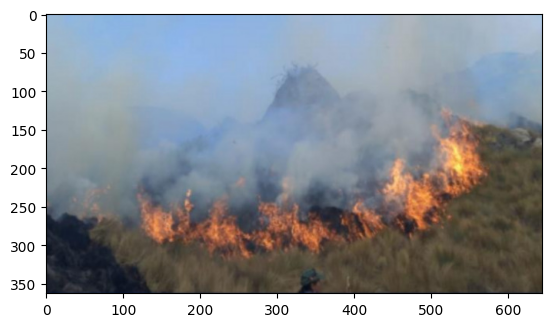

In [ ]:
Prediccion('test1.jpeg')

1/1 [==============================] - 0s 27ms/step
Fire


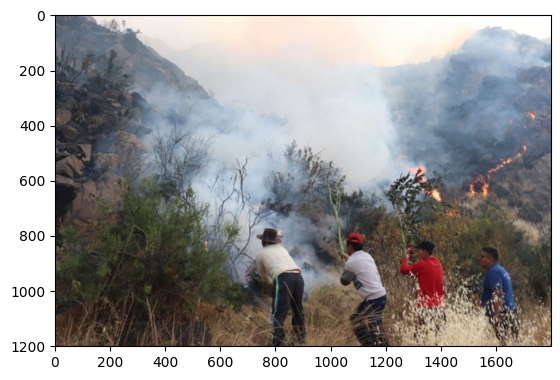

In [ ]:
Prediccion('test2.jpg')

1/1 [==============================] - 0s 21ms/step
Non Fire


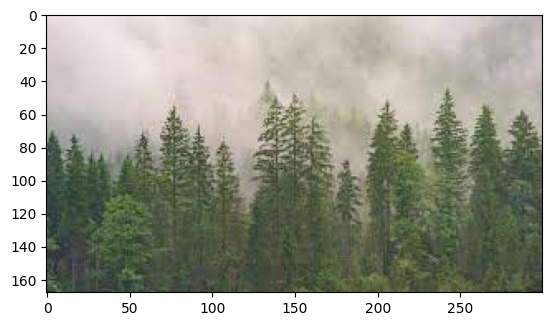

In [ ]:
Prediccion('test3.jpg')